In [1]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit_ibm_runtime.fake_provider import FakeHanoiV2
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import pickle
import numpy as np


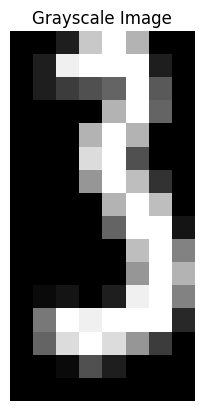

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the grayscale matrix (values from 0 to 255)
img = np.array([
    [  0,   0,  30, 200, 255, 180,   0,   0],
    [  0,  30, 240, 255, 255, 255,  30,   0],
    [  0,  30,  60,  80, 100, 255,  90,   0],
    [  0,   0,   0,   0, 180, 255, 100,   0],
    [  0,   0,   0, 180, 255, 180,   0,   0],
    [  0,   0,   0, 220, 255,  80,   0,   0],
    [  0,   0,   0, 150, 255, 190,  50,   0],
    [  0,   0,   0,   0, 180, 255, 190,   0],
    [  0,   0,   0,   0, 100, 255, 255,  20],
    [  0,   0,   0,   0,   0, 190, 255, 130],
    [  0,   0,   0,   0,   0, 150, 255, 180],
    [  0,  10,  20,   0,  30, 240, 255, 130],
    [  0, 120, 255, 240, 255, 255, 255,  40],
    [  0, 100, 220, 255, 220, 150,  60,   0],
    [  0,   0,  10,  80,  30,   0,   0,   0],
    [  0,   0,   0,   0,   0,   0,   0,   0]
], dtype=np.uint8)  # Use uint8 to represent image pixels correctlyplt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Image")
plt.axis('off')  # Hide axes
plt.show()

# Step 2: Show as grayscale image
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Image")
plt.axis('off')  # Hide axes
plt.show()

upper_half = img[:8, :]
lower_half = img[8:, :]

img_vec = upper_half + 1j * lower_half

"""psi_img = img_vec / np.linalg.norm(img_vec)
psi_img.reshape(-1)"""
vec = img_vec.flatten()
vec = vec.astype(np.complex128)
psi_img = vec / np.linalg.norm(vec)

In [63]:
psi_img, vec

(array([0.        +0.j        , 0.        +0.j        ,
        0.02040344+0.j        , 0.13602295+0.j        ,
        0.17342926+0.06801148j, 0.12242066+0.17342926j,
        0.        +0.17342926j, 0.        +0.0136023j ,
        0.        +0.j        , 0.02040344+0.j        ,
        0.16322754+0.j        , 0.17342926+0.j        ,
        0.17342926+0.j        , 0.17342926+0.1292218j ,
        0.02040344+0.17342926j, 0.        +0.08841492j,
        0.        +0.j        , 0.02040344+0.j        ,
        0.04080689+0.j        , 0.05440918+0.j        ,
        0.06801148+0.j        , 0.17342926+0.10201721j,
        0.06121033+0.17342926j, 0.        +0.12242066j,
        0.        +0.j        , 0.        +0.00680115j,
        0.        +0.0136023j , 0.        +0.j        ,
        0.12242066+0.02040344j, 0.17342926+0.16322754j,
        0.06801148+0.17342926j, 0.        +0.08841492j,
        0.        +0.j        , 0.        +0.08161377j,
        0.        +0.17342926j, 0.12242066+0.163

In [38]:
from utils import *
from teleport import *

In [64]:
n = 6

In [65]:
#Prepare state to teleport

psi_nq = state_prep(n)
psi_sv = Statevector(psi_img)

In [66]:
psi_img, vec

(array([0.        +0.j        , 0.        +0.j        ,
        0.02040344+0.j        , 0.13602295+0.j        ,
        0.17342926+0.06801148j, 0.12242066+0.17342926j,
        0.        +0.17342926j, 0.        +0.0136023j ,
        0.        +0.j        , 0.02040344+0.j        ,
        0.16322754+0.j        , 0.17342926+0.j        ,
        0.17342926+0.j        , 0.17342926+0.1292218j ,
        0.02040344+0.17342926j, 0.        +0.08841492j,
        0.        +0.j        , 0.02040344+0.j        ,
        0.04080689+0.j        , 0.05440918+0.j        ,
        0.06801148+0.j        , 0.17342926+0.10201721j,
        0.06121033+0.17342926j, 0.        +0.12242066j,
        0.        +0.j        , 0.        +0.00680115j,
        0.        +0.0136023j , 0.        +0.j        ,
        0.12242066+0.02040344j, 0.17342926+0.16322754j,
        0.06801148+0.17342926j, 0.        +0.08841492j,
        0.        +0.j        , 0.        +0.08161377j,
        0.        +0.17342926j, 0.12242066+0.163

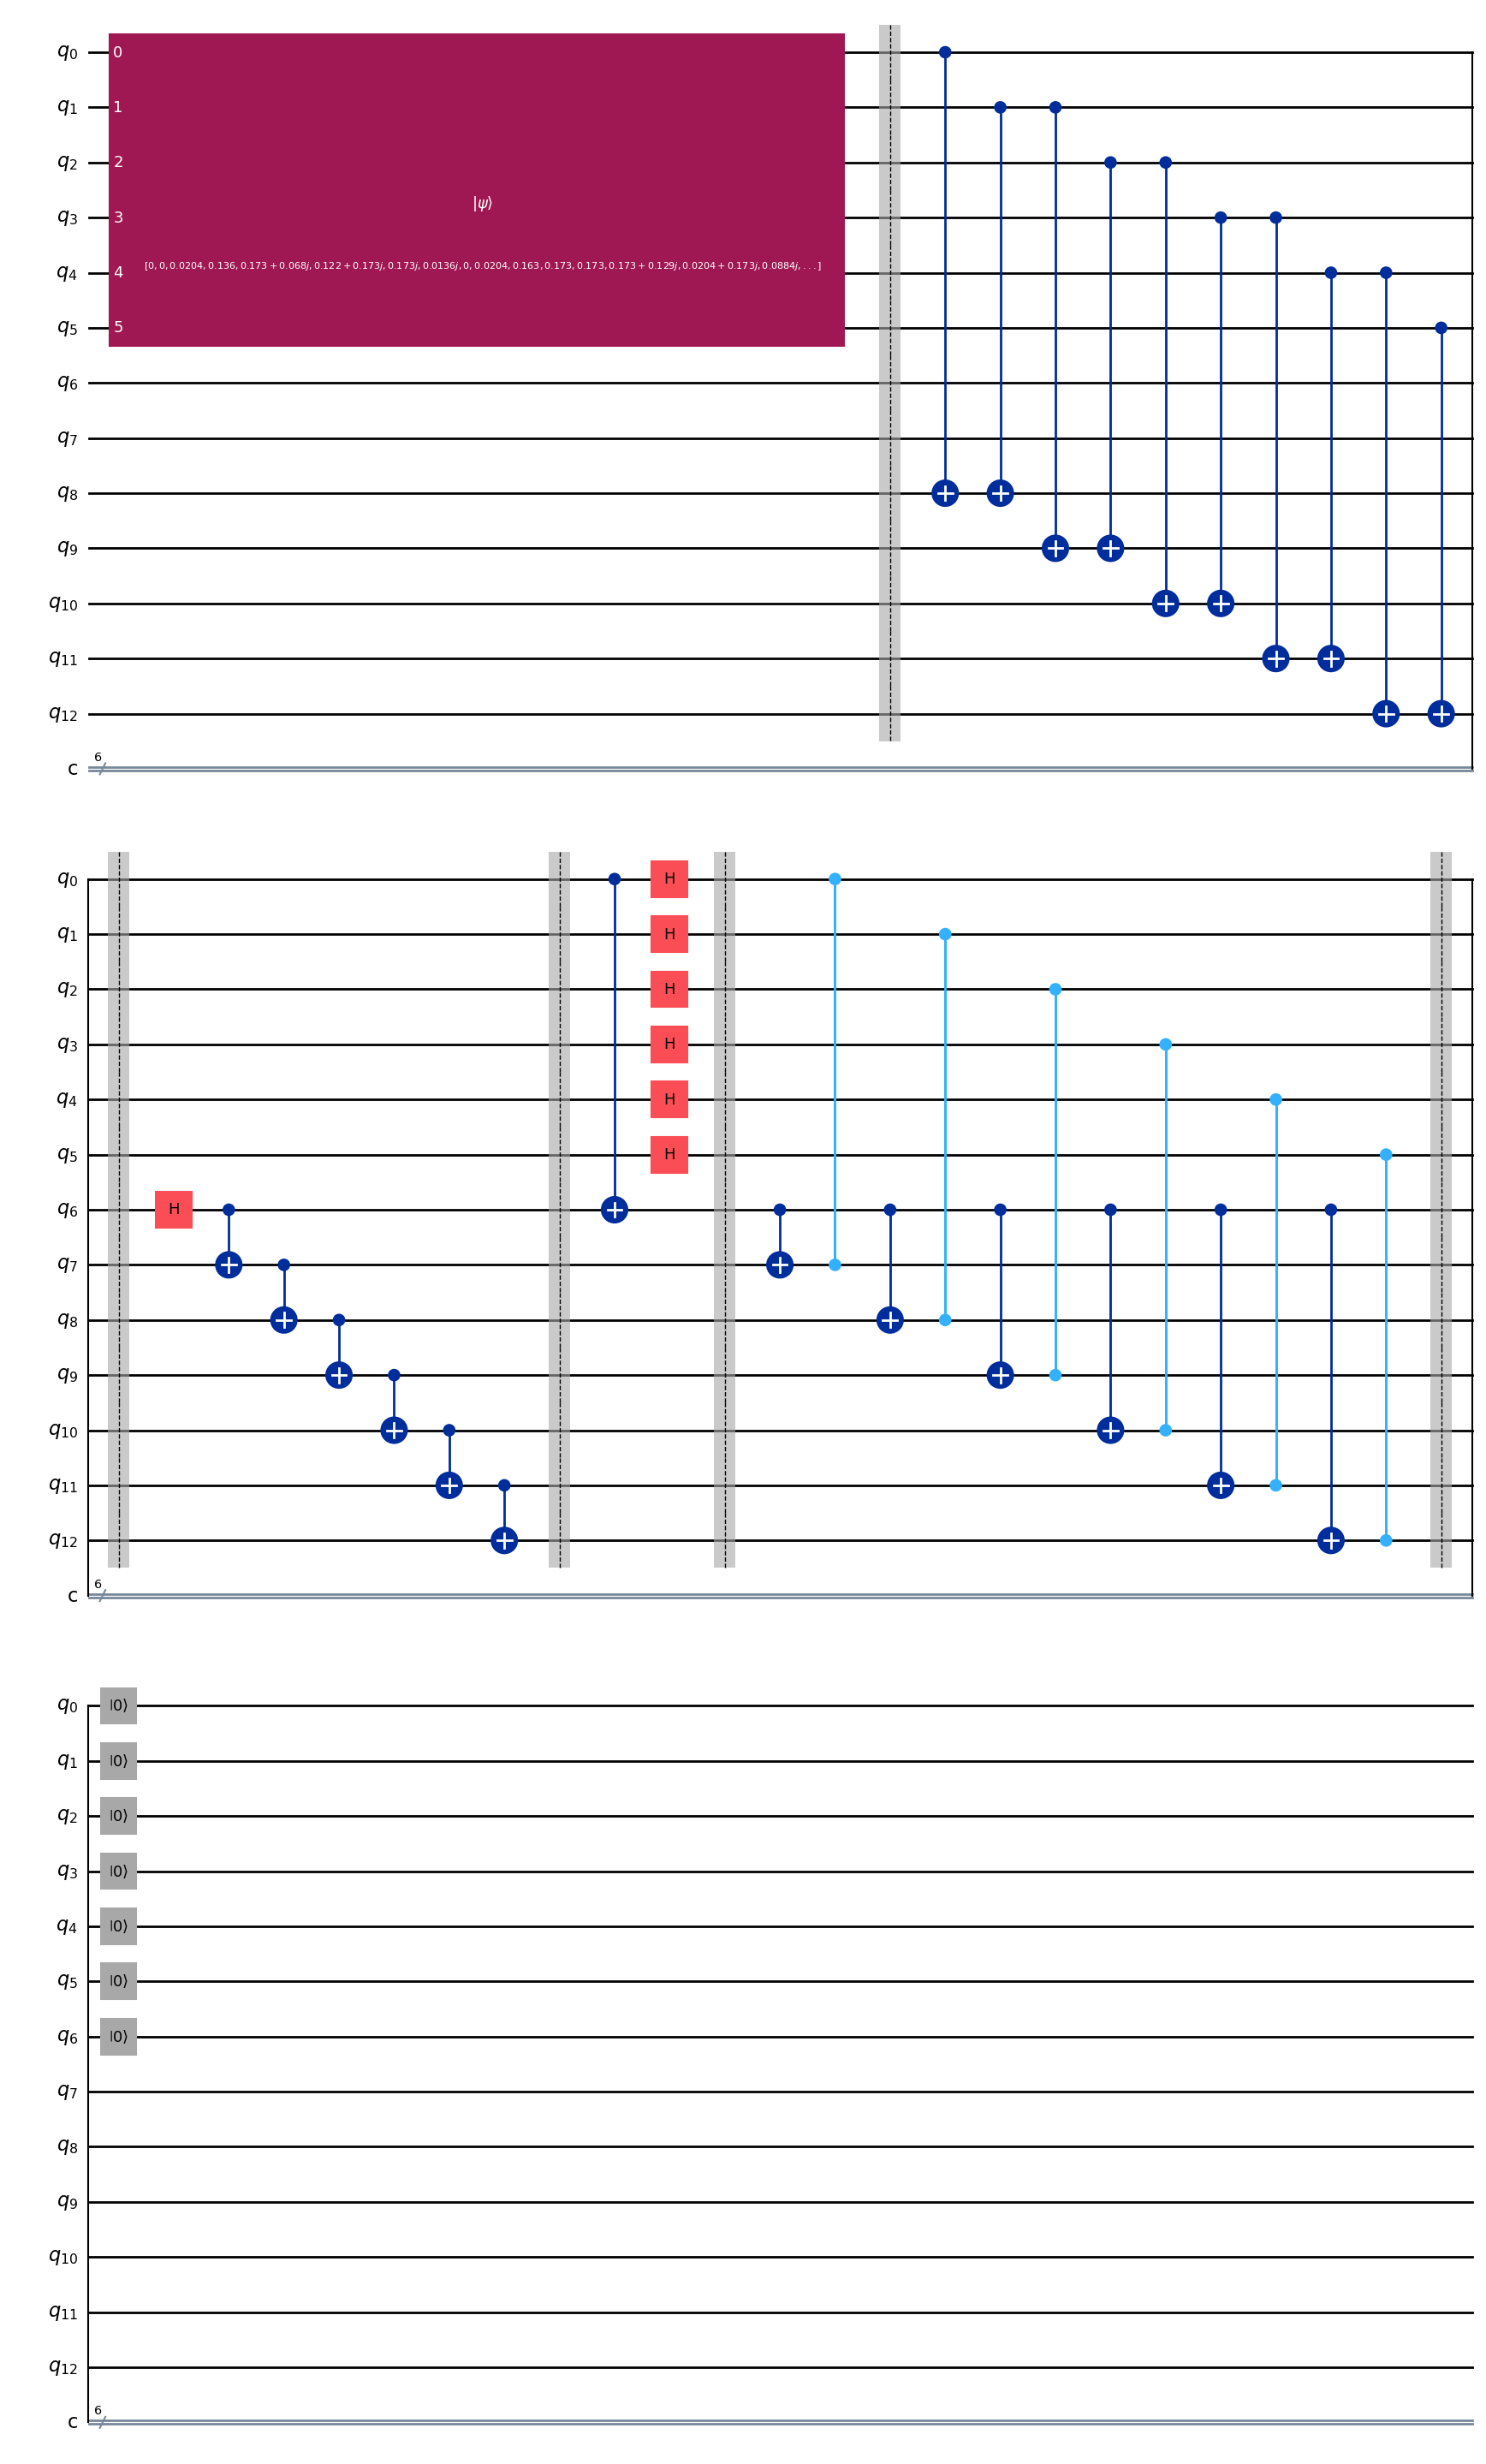

In [97]:
#Run teleportation circuit

#qca, ca = teleportation_circuit(n, psi_img.reshape(64,))
qca, ca = teleportation_circuit(n, psi_sv)
qca.draw('mpl')

In [98]:
psi_img, vec

(array([0.        +0.j        , 0.        +0.j        ,
        0.02040344+0.j        , 0.13602295+0.j        ,
        0.17342926+0.06801148j, 0.12242066+0.17342926j,
        0.        +0.17342926j, 0.        +0.0136023j ,
        0.        +0.j        , 0.02040344+0.j        ,
        0.16322754+0.j        , 0.17342926+0.j        ,
        0.17342926+0.j        , 0.17342926+0.1292218j ,
        0.02040344+0.17342926j, 0.        +0.08841492j,
        0.        +0.j        , 0.02040344+0.j        ,
        0.04080689+0.j        , 0.05440918+0.j        ,
        0.06801148+0.j        , 0.17342926+0.10201721j,
        0.06121033+0.17342926j, 0.        +0.12242066j,
        0.        +0.j        , 0.        +0.00680115j,
        0.        +0.0136023j , 0.        +0.j        ,
        0.12242066+0.02040344j, 0.17342926+0.16322754j,
        0.06801148+0.17342926j, 0.        +0.08841492j,
        0.        +0.j        , 0.        +0.08161377j,
        0.        +0.17342926j, 0.12242066+0.163

In [99]:
sva = Statevector.from_instruction(qca)
sva

Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [100]:
sva = Statevector.from_instruction(qca)
sv_sent = extract_state(sva)
sv_sent 

array([0.        +0.j        , 0.        +0.j        ,
       0.02040344+0.j        , 0.13602295+0.j        ,
       0.17342926+0.06801148j, 0.12242066+0.17342926j,
       0.        +0.17342926j, 0.        +0.0136023j ,
       0.        +0.j        , 0.02040344+0.j        ,
       0.16322754+0.j        , 0.17342926+0.j        ,
       0.17342926+0.j        , 0.17342926+0.1292218j ,
       0.02040344+0.17342926j, 0.        +0.08841492j,
       0.        +0.j        , 0.02040344+0.j        ,
       0.04080689+0.j        , 0.05440918+0.j        ,
       0.06801148+0.j        , 0.17342926+0.10201721j,
       0.06121033+0.17342926j, 0.        +0.12242066j,
       0.        +0.j        , 0.        +0.00680115j,
       0.        +0.0136023j , 0.        +0.j        ,
       0.12242066+0.02040344j, 0.17342926+0.16322754j,
       0.06801148+0.17342926j, 0.        +0.08841492j,
       0.        +0.j        , 0.        +0.08161377j,
       0.        +0.17342926j, 0.12242066+0.16322754j,
       0.1

In [101]:
np.linalg.norm(vec)

np.float64(1470.3400967123218)

In [102]:
sv_sent = sv_sent * np.linalg.norm(vec)

sv_sent

array([  0.  +0.j,   0.  +0.j,  30.  +0.j, 200.  +0.j, 255.+100.j,
       180.+255.j,   0.+255.j,   0. +20.j,   0.  +0.j,  30.  +0.j,
       240.  +0.j, 255.  +0.j, 255.  +0.j, 255.+190.j,  30.+255.j,
         0.+130.j,   0.  +0.j,  30.  +0.j,  60.  +0.j,  80.  +0.j,
       100.  +0.j, 255.+150.j,  90.+255.j,   0.+180.j,   0.  +0.j,
         0. +10.j,   0. +20.j,   0.  +0.j, 180. +30.j, 255.+240.j,
       100.+255.j,   0.+130.j,   0.  +0.j,   0.+120.j,   0.+255.j,
       180.+240.j, 255.+255.j, 180.+255.j,   0.+255.j,   0. +40.j,
         0.  +0.j,   0.+100.j,   0.+220.j, 220.+255.j, 255.+220.j,
        80.+150.j,   0. +60.j,   0.  +0.j,   0.  +0.j,   0.  +0.j,
         0. +10.j, 150. +80.j, 255. +30.j, 190.  +0.j,  50.  +0.j,
         0.  +0.j,   0.  +0.j,   0.  +0.j,   0.  +0.j,   0.  +0.j,
       180.  +0.j, 255.  +0.j, 190.  +0.j,   0.  +0.j])

In [107]:
sv_sent = sv_sent.reshape(8, 8)


In [108]:
ush = []
lsh = []
l = len(sv_sent)
w = len(sv_sent[0])
for i in range(l):
    for j in range(w):
        
        ush.append(sv_sent[i][j].real)
        lsh.append(sv_sent[i][j].imag)

In [111]:
upper_senthalf = np.array(ush).reshape(8, 8)
lower_senthalf = np.array(lsh).reshape(8, 8)

psi_sentimg = np.vstack((upper_senthalf, lower_senthalf))
psi_sentimg

array([[  0.,   0.,  30., 200., 255., 180.,   0.,   0.],
       [  0.,  30., 240., 255., 255., 255.,  30.,   0.],
       [  0.,  30.,  60.,  80., 100., 255.,  90.,   0.],
       [  0.,   0.,   0.,   0., 180., 255., 100.,   0.],
       [  0.,   0.,   0., 180., 255., 180.,   0.,   0.],
       [  0.,   0.,   0., 220., 255.,  80.,   0.,   0.],
       [  0.,   0.,   0., 150., 255., 190.,  50.,   0.],
       [  0.,   0.,   0.,   0., 180., 255., 190.,   0.],
       [  0.,   0.,   0.,   0., 100., 255., 255.,  20.],
       [  0.,   0.,   0.,   0.,   0., 190., 255., 130.],
       [  0.,   0.,   0.,   0.,   0., 150., 255., 180.],
       [  0.,  10.,  20.,   0.,  30., 240., 255., 130.],
       [  0., 120., 255., 240., 255., 255., 255.,  40.],
       [  0., 100., 220., 255., 220., 150.,  60.,   0.],
       [  0.,   0.,  10.,  80.,  30.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

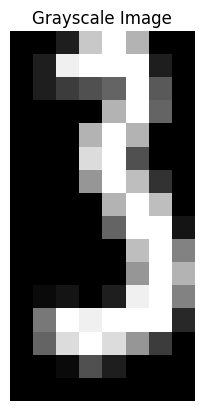

In [112]:
plt.imshow(psi_sentimg, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Image")
plt.axis('off')  # Hide axes
plt.show()

In [113]:
print(np.allclose(img, psi_sentimg))

True
